## Hands on

- We have 1000 slice files with 1000 playlists each, and we have to extract data from them, which is in json format. 
- Core information on this dataset is playlist information and playlist's tracks information
- Each playlist is unique, but track ids will sometimes be repeated if track exists in multiple playlists

### First inqueries:

_How will we extract the data? shall we build one table for data or multiple views?_

- First approach that comes to mind is to import all of track information and repeat playlist information to each row. We would be creating a dataset that contains 1 million rows times the amount of tracks each playlist has. This could mean several tens of millions of rows, very hard to manipulate. I could start with a smaller sample of 100 or 1000 playlists. 
- Another way of doing it is aggregating track information to playlist and creating a dataset with 1.000.000 rows, one for each playlist. We lose valuable track information, but we make the dataset processing quite lighter. Track information is just too valuable to lose, so the aggregation technique should be such that we keep critical information for playlist tracks. 

If we can create clusters in which we can place all of our playlist's names, then we can perhaps categorize playlists with this groups and recommend tracks from one playlist to another given its corresponding cluster. 

_Preliminary projections: What information does this dataset have to predict certain track for certain playlist?_

- Number of times the track appears on playlists
- Number of times the track appears on playlists with similar name (NLP?)

#### Final product

We should be able to enter a playlist name and get recomendations for it. This list of tasks is directly taken out of challenge readme file:

1. Predict tracks for a playlist given its title only
2. Predict tracks for a playlist given its title and the first track
3. Predict tracks for a playlist given its title and the first 5 tracks
4. Predict tracks for a playlist given its first 5 tracks (no title)
5. Predict tracks for a playlist given its title and the first 10 tracks
6. Predict tracks for a playlist given its first ten tracks (no title)
7. Predict tracks for a playlist given its title and the first 25 tracks
8. Predict tracks for a playlist given its title and 25 random tracks
9. Predict tracks for a playlist given its title and the first 100 tracks
10. Predict tracks for a playlist given its title and 100 random tracks

We derive from this that the input for our predictor will be a playlist name and/or tracks.

#### Important features:
- track album
- track




In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# NLP
from wordcloud import WordCloud

We will first attempt to import all tracks and repeat playlist information for each row. But since i'm scared of slow performance, we will try first with only 1000 playlists and see what we get.  

## Playlist names exploration

Let's use some well known techniques to study how people name playlists

In [2]:
# json files will be kept as local files but are available in challenge main page
with open('../spotify_million_playlist_dataset/data/mpd.slice.0-999.json') as f:
    data = json.loads(f.read())

playlists = pd.DataFrame(data['playlists'], columns=['name'])

In [3]:
playlists

,name
0,Throwbacks
1,Awesome Playlist
2,korean
3,mat
4,90s
...,...
995,old
996,Daze
997,rap
998,Country


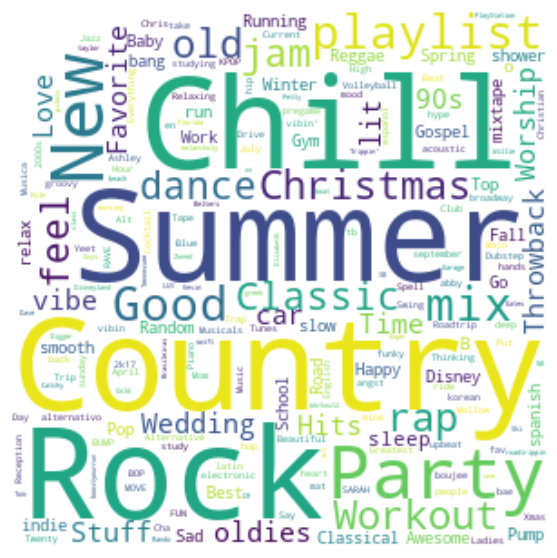

In [21]:
x, y = np.ogrid[:300, :300]
mask = x * y < 500
mask = 255 * mask.astype(int)

# gather all words in a single string
words = playlists['name'].str.cat(sep=' ')

# remove words that don't bring anything to the table and are very frequent
words = ' '.join([x for x in words.split(' ') if x.lower() not in ['music', 'songs']]) 

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(words)
fig = plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()